<a href="https://colab.research.google.com/github/ashplosive/Solar-PV-forecast-with-Machine-Learning-/blob/main/solarpvmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Loading data from the Dataset

In [61]:
filepath = '/content/Plant_1_Generation_Data.csv' #load the filepath from the files section
df = pd.read_csv(filepath)

# printing the first few rows of the csv file to identify the features
print(df.head(-50))

#assigning net current to total yeild column of the csv dataset
net_current = df["TOTAL_YIELD"]

              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68723  17-06-2020 23:15   4135001  bvBOhCH3iADSZry       0.0       0.0   
68724  17-06-2020 23:15   4135001  iCRJl6heRkivqQ3       0.0       0.0   
68725  17-06-2020 23:15   4135001  ih0vzX44oOqAx2f       0.0       0.0   
68726  17-06-2020 23:15   4135001  pkci93gMrogZuBj       0.0       0.0   
68727  17-06-2020 23:15   4135001  rGa61gmuvPhdLxV       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0              0.0    6259559.0  
1              0.0    6183645.0  
2        

# Scaling data between 0 and 1

In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_net_current = scaler.fit_transform(net_current.values.reshape(-1,1))

Defining Parameters

In [47]:
look_back = 10
epochs = 100

Create sequences for training

In [49]:
X, Y = [], []
for i in range(look_back, len(scaled_net_current)):
  X.append(scaled_net_current[i-look_back:i,0])
  Y.append(scaled_net_current[i,0])

X = np.array(X)
Y = np.array(Y)

Reshape input for LSTM

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

Train the model

In [ ]:
model.fit(X,Y,epochs=epochs, batch_size=32)

Make predictions on new data

In [53]:
new_data = scaled_net_current[-look_back:]  # Last look_back values for prediction
new_data = new_data.reshape(1, look_back, 1)
predicted_net_current = model.predict(new_data)

1/1 [==============================] - 0s 25ms/step


Invert scaling for predicted current and original current

In [54]:
predicted_net_current = scaler.inverse_transform(predicted_net_current)
original_net_current = scaler.inverse_transform(scaled_net_current)

Prepare data for plotting

In [55]:
time_steps = range(len(original_net_current))

Plot the historical data, forecast and predicted data

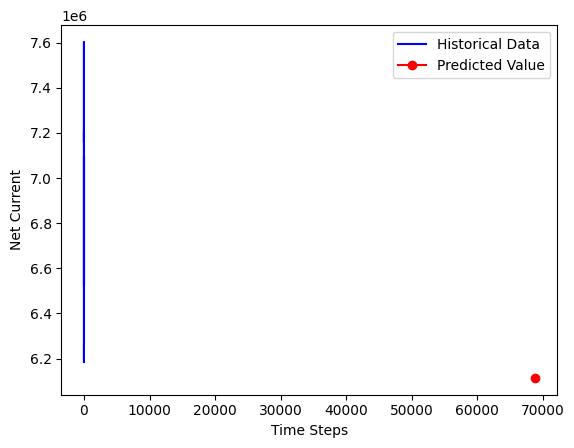

In [59]:
plt.plot(time_steps[:look_back], original_net_current[:look_back], color='blue', label='Historical Data')
plt.plot(time_steps[-1], predicted_net_current[0][0], marker='o', color='red', label='Predicted Value')
plt.xlabel('Net Curent')
plt.ylabel('')
plt.legend()
plt.show()